### Summary

Using clustering analysis on 29 solar system bodies, I was able to provide data that Pluto
is more similar to non-planetary solar system bodies than to the actual
planets. The controversial recategorization of Pluto in 2006 seems to follow from an
objective perspective.

### Motivation
<img src="https://planetary.s3.amazonaws.com/web/assets/pictures/20200416_mass-distance-infographic.png" alt="Plot of Solar System Bodies Based on Mass and Distance from Sun" title="The Biggest Planents Stand Out"/>

Inspired by this image, posted by The Planetary Society, I decided to look at whether Pluto
should be a planet from a clustering perspec􀆟ve. This topic is controversial to many,
especially as some of us grew up considering it a planet and there is a certain fondness
for that classification. The US state of Arizona even passed a law giving it planetary
status. There are often accusations that the removal of its planet status was somehow
political and not scientific. Based on the image above, which incorporates solar system
bodies’ mass and distance from the Sun on log scales, my guess is that the solar system
should be grouped into three or four groups: planets, near small objects (asteroid belt),
and far small objects (trans-Neptunian objects); or terrestrial planets, gas giants, asteroid belt objects,
and trans-Neptunian objects. Pluto looks like it belongs to the trans-Neptunian objects. I decided to dig a little deeper.

### Methods

# Variables
I chose the variables brightness, diameter, rotational period, mass, eccentricity, semimajor
axis (orbital distance, roughly), inclination, and orbital period.

# Bodies Analyzed
I chose all bodies I could find on Wikipedia with all of those variables known and found
29 bodies: Jupiter, Saturn, Neptune, Uranus, Earth, Venus, Mars, Mercury, Eris, Pluto,
Haumea, Makemake, Gonggong, Quaoar, Ceres, Salacia, 4 Vesta, Sedna, Varda, 2 Pallas,
2003 AZ84, Gǃkúnǁʼhòmdímà, 2002 UX25, 10 Hygiea, 704 Interamnia, Huya, 16 Psyche,
107 Camilla, and 22 Kalliope.

Gǃkúnǁʼhòmdímà, a Namibian name, posed a problem due to its non-standard letters, so
I had to use the “latin1” encoding for pandas.read_csv().

# Analysis
I removed brightness, diameter and orbital period out because they were collinear with mass (first two) and semimajor axis (orbital period). I took the log of all variables except eccentricity and inclination given their limited range to begin with. I then normalized all values.
To determine which number of clusters I should use, I looked at both silhouette score and elbow score. I ran the below clustering algorithm and compared their clusters to the classification on Wikipedia.

In [1]:
#Windows memory leak
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import silhouette_score
import pandas as pd

In [3]:
# Read the CSV file using pandas
df = pd.read_csv('SolarSystemBodies.csv', encoding='latin1')

# Extract the names (first column) and data (remaining columns)
names = df.iloc[:, 0].values  # Names are in the first column
data = df.iloc[:, 1:].values  # Convert the remaining columns to float values
feature_names = df.columns[1:]  # Use the remaining columns as feature names

In [4]:
MAX_CLUSTERS = 10
silTotal=[]
inertia=[]

for i in range(2,MAX_CLUSTERS):
    kmeans = KMeans(i, random_state=42)
    silTotal.append(silhouette_score(data, kmeans.fit_predict(data)))
    inertia.append(kmeans.inertia_)

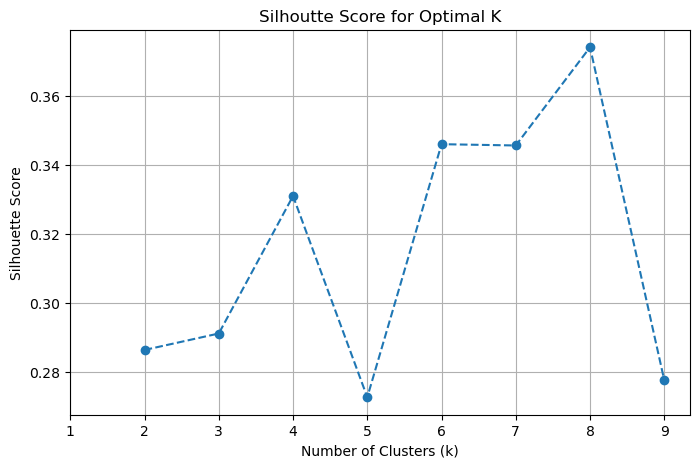

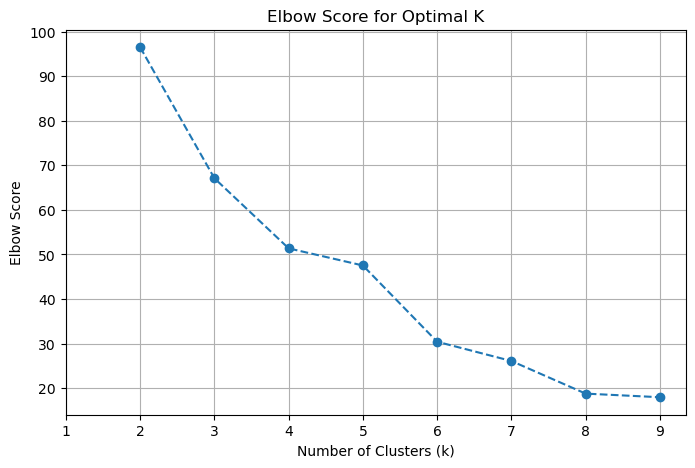

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(range(2,MAX_CLUSTERS),silTotal, marker='o', linestyle='--')
plt.title('Silhoutte Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(range(1,MAX_CLUSTERS))
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(2,MAX_CLUSTERS),inertia, marker='o', linestyle='--')
plt.title('Elbow Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Elbow Score')
plt.grid(True)
plt.xticks(range(1,MAX_CLUSTERS))
plt.show()

The silhouette score strongly suggests 5 groups if I don't want 9 clusters for this few data points. The elbow graph suggests 4 or 6 but between the two I will choose 5 groups.

In [6]:
# Fit the KMeans model with the chosen number of clusters
N_CLUSTERS = 5
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=1)
kmeans.fit(data)

# Combine names with their cluster labels
clusters = list(zip(names, kmeans.labels_))

In [7]:
# Print the results
print("Celestial Body Clusters:")
for name, cluster in clusters:
    print(f"{name}: Cluster {cluster}")

# Prepare data for the decision tree
X = data  # Features (input)
y = kmeans.labels_  # Cluster labels (target)

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y);

Celestial Body Clusters:
Jupiter: Cluster 2
Saturn: Cluster 2
Neptune: Cluster 2
Uranus: Cluster 2
Earth: Cluster 2
Venus: Cluster 3
Mars: Cluster 2
Mercury: Cluster 3
Eris: Cluster 0
Pluto: Cluster 0
Haumea: Cluster 1
Makemake: Cluster 1
Gonggong: Cluster 0
Quaoar: Cluster 1
Ceres: Cluster 4
Salacia: Cluster 1
4 Vesta: Cluster 4
Sedna: Cluster 0
Varda: Cluster 1
2 Pallas : Cluster 1
2003 AZ84: Cluster 1
G?kún??hòmdímà: Cluster 0
2002 UX25: Cluster 1
10 Hygiea: Cluster 4
704 Interamnia: Cluster 4
Huya: Cluster 1
16 Psyche: Cluster 4
107 Camilla: Cluster 4
22 Kalliope : Cluster 4


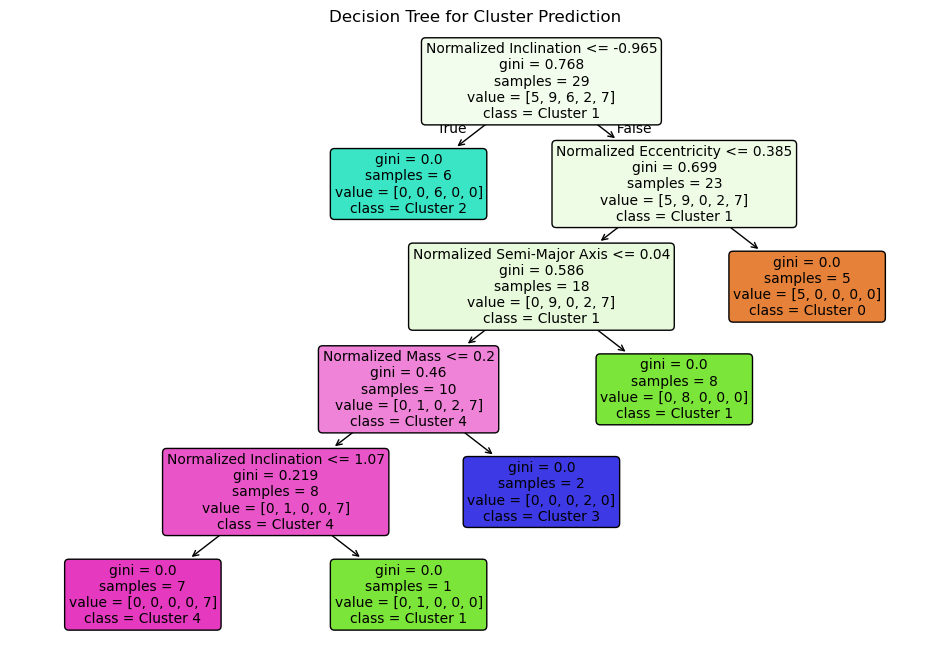

In [8]:
# Plot the decision tree
plt.figure(figsize=(12, 8), dpi=100)
plot_tree(
    decision_tree,
    feature_names=feature_names,
    class_names=[f"Cluster {i}" for i in range(N_CLUSTERS)],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Cluster Prediction")
plt.show()

I looked up the classification of each body on Wikipedia and found this:

| **Body**                   | **Cluster** | **Ordinary Classification**     |
|----------------------------|-------------|---------------------------------|
| Jupiter                    | 2           | Planet                          |
| Saturn                     | 2           | Planet                          |
| Neptune                    | 2           | Planet                          |
| Uranus                     | 2           | Planet                          |
| Earth                      | 2           | Planet                          |
| Venus                      | 3           | Planet                          |
| Mars                       | 2           | Planet                          |
| Mercury                    | 3           | Planet                          |
| Eris                       | 0           | Trans-Neptunian Object          |
| Pluto                      | 0           | Trans-Neptunian Object          |
| Haumea                     | 1           | Trans-Neptunian Object          |
| Makemake                   | 1           | Trans-Neptunian Object          |
| Gonggong                   | 0           | Trans-Neptunian Object          |
| Quaoar                     | 1           | Trans-Neptunian Object          |
| Ceres                      | 4           | Asteroid Belt                   |
| Salacia                    | 1           | Trans-Neptunian Object          |
| 4 Vesta                    | 4           | Asteroid Belt                   |
| Sedna                      | 0           | Trans-Neptunian Object          |
| Varda                      | 1           | Trans-Neptunian Object          |
| 2 Pallas                   | 1           | Asteroid Belt                   |
| 2003 AZ84                  | 1           | Trans-Neptunian Object          |
| G?kún??hòmdímà             | 0           | Trans-Neptunian Object          |
| 2002 UX25                  | 1           | Trans-Neptunian Object          |
| 10 Hygiea                  | 4           | Asteroid Belt                   |
| 704 Interamnia             | 4           | Asteroid Belt                   |
| Huya                       | 1           | Trans-Neptunian Object          |
| 16 Psyche                  | 4           | Asteroid Belt                   |
| 107 Camilla                | 4           | Asteroid Belt                   |
| 22 Kalliope                | 4           | Asteroid Belt                   |


Clusters 0 and 1, which were high inclination, high eccentricity, low mass and high semi-major axis, contained Trans-Neptunian Objects and one asteroid. Notably, Pluto is included in these clusters. Cluster 2 contained the outer 6 planets, while cluster 3 contained the innermost two planets. Cluster 4 contained all the other asteroids.

This is mostly a good, consistent sorting, with the only real exception being 2 Pallas which was miscategorized as a TNO. The decision tree very nearly categorized it with asteroids, interestingly. Next I analyze whether Pluto is ever categorized with the planets.

In [9]:
planets = {'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'}
pluto = 'Pluto'

results = []

for k in range(2, 10):  # cluster counts
    for seed in range(50):  # seeds
        model = KMeans(n_clusters=k, random_state=seed)
        labels = model.fit_predict(data)

        name_to_cluster = dict(zip(names, labels))
        pluto_cluster = name_to_cluster[pluto]
        
        # Check if any planet shares Pluto's cluster
        in_same_cluster = any(name_to_cluster[planet] == pluto_cluster for planet in planets)
        
        results.append((k, seed, in_same_cluster))

results_df = pd.DataFrame(results, columns=['n_clusters', 'seed', 'pluto_with_planet'])
summary = results_df.groupby('n_clusters')['pluto_with_planet'].mean()
print(summary)

n_clusters
2    0.18
3    0.04
4    0.02
5    0.02
6    0.00
7    0.00
8    0.00
9    0.00
Name: pluto_with_planet, dtype: float64


We see here that in some random seeds, for small numbers of clusters, Pluto is categorized with at least one planet. In the 18% of two cluster cases where Pluto is classed with the planets, so are many other things we definitely would not consider to be a planet (or maybe we would); otherwise it is quite rare for Pluto to be classed with the planets.
<img src="https://imgs.xkcd.com/comics/planet_definitions.png" alt="A few funny definitions of a planet" title="Planet Definitions by XKCD"/>

### Conclusion

The motivating photograph at the start implies an intuitive sorting of the main solar system bodies into terrestrial
planets, gas giants, asteroid belt objects, and trans-Neptunian objects. My analysis showed
this to be a reasonable sorting. The silhouette score and elbow scores did not match up perfectly but were close. I used the silhouette optimizer which happened to also be the mean of the elbow scores. The intuitive result confirmed that
this was a good choice. It would be nice to be able to analyze more of the millions of
solar system bodies, but good data is not available for many other bodies. An analysis
with fewer variables could allow more bodies to be analyzed and it would be interesting
to see if they form their own categories or fall in with the existing ones. Most bodies
that had partial data were particularly small or particularly far. Finally, the analysis here
suggests strongly that Pluto has characteristics mostly dissimilar to those of planets and
thus should be treated separately.